In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
%matplotlib inline

reload(sys)  
sys.setdefaultencoding('utf8')

import statsmodels.api as sm


In [6]:
train = pd.read_csv("data/train_1.csv")
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
train.shape

(145063, 551)

In [8]:
train.Page.head()

0              2NE1_zh.wikipedia.org_all-access_spider
1               2PM_zh.wikipedia.org_all-access_spider
2                3C_zh.wikipedia.org_all-access_spider
3           4minute_zh.wikipedia.org_all-access_spider
4    52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
Name: Page, dtype: object

In [9]:
#split page column with '_' and take the last three values
metadata = pd.DataFrame((row.split('_')[-3:] for row in train.Page), columns=['host', 'access', 'agent'])
#get the lang part from 'zh.wikipedia.org'
metadata['lang'] = metadata.host.str.split('.').str.get(0)
metadata.head()

,host,access,agent,lang
0,zh.wikipedia.org,all-access,spider,zh
1,zh.wikipedia.org,all-access,spider,zh
2,zh.wikipedia.org,all-access,spider,zh
3,zh.wikipedia.org,all-access,spider,zh
4,zh.wikipedia.org,all-access,spider,zh


In [11]:
trainDF = pd.concat([train,metadata], axis=1)

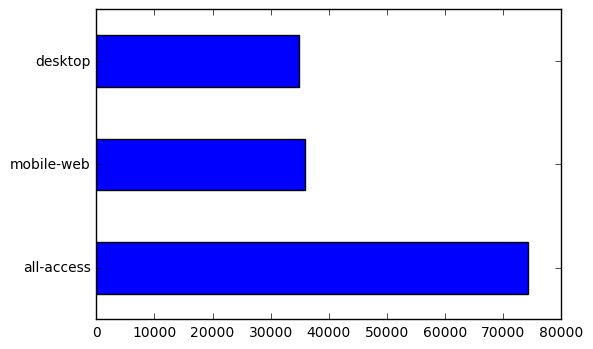

In [12]:
trainDF.access.value_counts().plot(kind="barh")

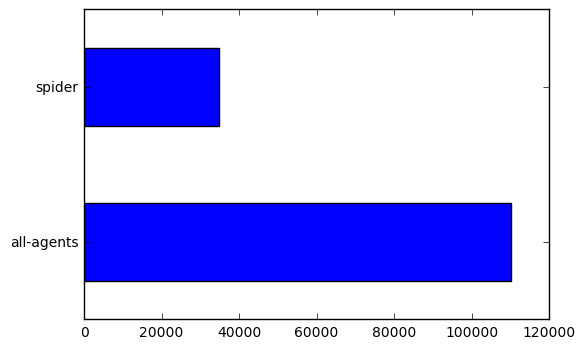

In [13]:
trainDF.agent.value_counts().plot(kind="barh")

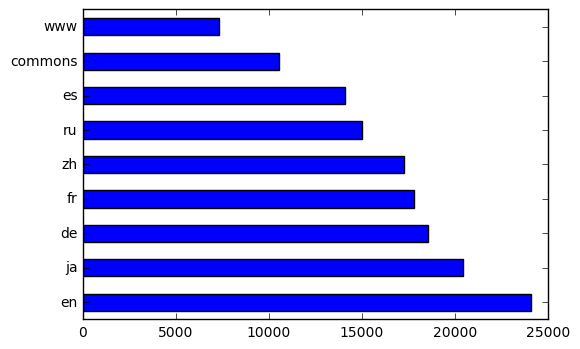

In [14]:
trainDF.lang.value_counts().plot(kind="barh")

In [15]:
trainDF[trainDF.lang=='www'].Page.head(10)
#generally lang==www does not contain any language information they are mediawiki articles

19611    "Keep_me_logged_in"_extended_to_one_year_www.m...
19612    2017_wikitext_editor_www.mediawiki.org_all-acc...
19613    2017_wikitext_editor/Feedback_www.mediawiki.or...
19614          API_www.mediawiki.org_all-access_all-agents
19615    API:Account_creation_www.mediawiki.org_all-acc...
19616    API:Allimages_www.mediawiki.org_all-access_all...
19617    API:Allpages_www.mediawiki.org_all-access_all-...
19618    API:Backlinks_www.mediawiki.org_all-access_all...
19619    API:Categoryinfo_www.mediawiki.org_all-access_...
19620    API:Client_Code_www.mediawiki.org_all-access_a...
Name: Page, dtype: object

In [16]:
trainDF[trainDF.lang=='commons'].Page.head(10)
#generally lang==commons does not contain any language information they are wikimedia articlese the warnings, itertools, pandas, numpy, matplotlib and statsmodels libraries. The warnings and itertools libraries come incle the warnings, itertools, pandas, numpy, matplotlib and statsmodels libraries. The warnings and itertools libraries come incl

13332      Accueil_commons.wikimedia.org_all-access_spider
13333    Atlas_of_Asia_commons.wikimedia.org_all-access...
13334    Atlas_of_Europe_commons.wikimedia.org_all-acce...
13335    Atlas_of_World_War_II_commons.wikimedia.org_al...
13336    Atlas_of_colonialism_commons.wikimedia.org_all...
13337    Atlas_of_the_United_Kingdom_commons.wikimedia....
13338    Atlas_of_the_United_States_commons.wikimedia.o...
13339       Bikini_commons.wikimedia.org_all-access_spider
13340    Campaign:OFBA2016_commons.wikimedia.org_all-ac...
13341    Catalogue_of_Wilhelm_von_Gloeden's_pictures_co...
Name: Page, dtype: object

## Analysis of Time Series according to languages

In [17]:
trainDF.lang.unique()

array(['zh', 'fr', 'en', 'commons', 'ru', 'www', 'de', 'ja', 'es'], dtype=object)

In [18]:
langDict = {}
langDict['zh'] = trainDF[trainDF.lang=='zh']
langDict['fr'] = trainDF[trainDF.lang=='fr']
langDict['en'] = trainDF[trainDF.lang=='en']
langDict['commons'] = trainDF[trainDF.lang=='commons']
langDict['ru'] = trainDF[trainDF.lang=='ru']
langDict['www'] = trainDF[trainDF.lang=='www']
langDict['de'] = trainDF[trainDF.lang=='de']
langDict['ja'] = trainDF[trainDF.lang=='ja']
langDict['es'] = trainDF[trainDF.lang=='es']

In [19]:
avg = {}
for key in langDict:
    avg[key] = pd.to_numeric(langDict[key].iloc[:,1:].sum(axis=0), errors='coerce')/ langDict[key].shape[0]
    #values for host, access and agent are NaN hence dropping them
    avg[key].dropna(inplace=True)
#     convert index to datetime
    avg[key].index = pd.to_datetime(avg[key].index)

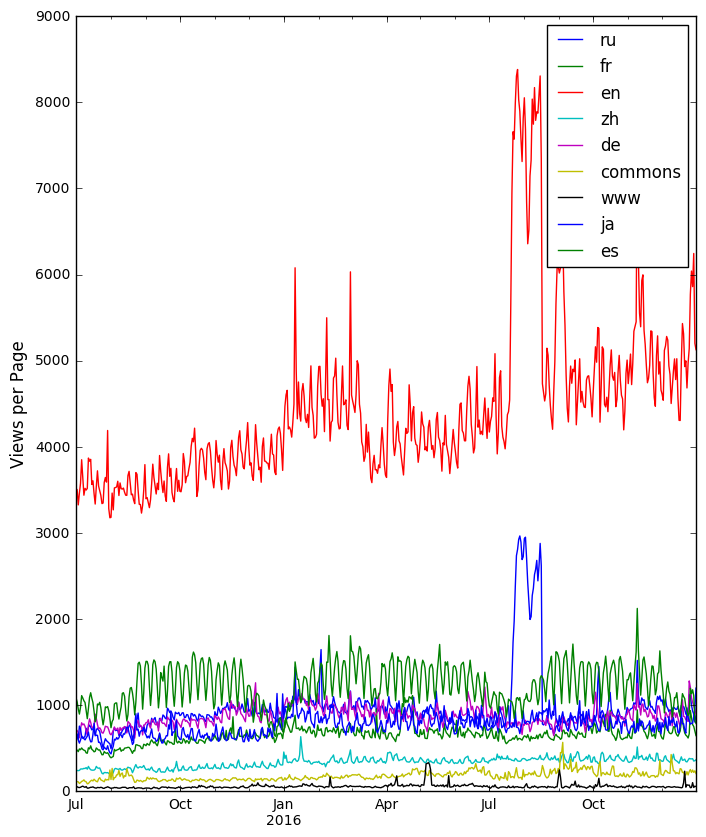

In [20]:
fig, ax = plt.subplots( figsize=(8, 10), sharex=True)
for key in avg:
    avg[key].plot(label=key)
plt.legend(loc='best')
ax.set_ylabel('Views per Page', size=12)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend()
            
#     print key
#     plt.plot(np.array(avg[key].index), np.array(avg[key]), label = key)

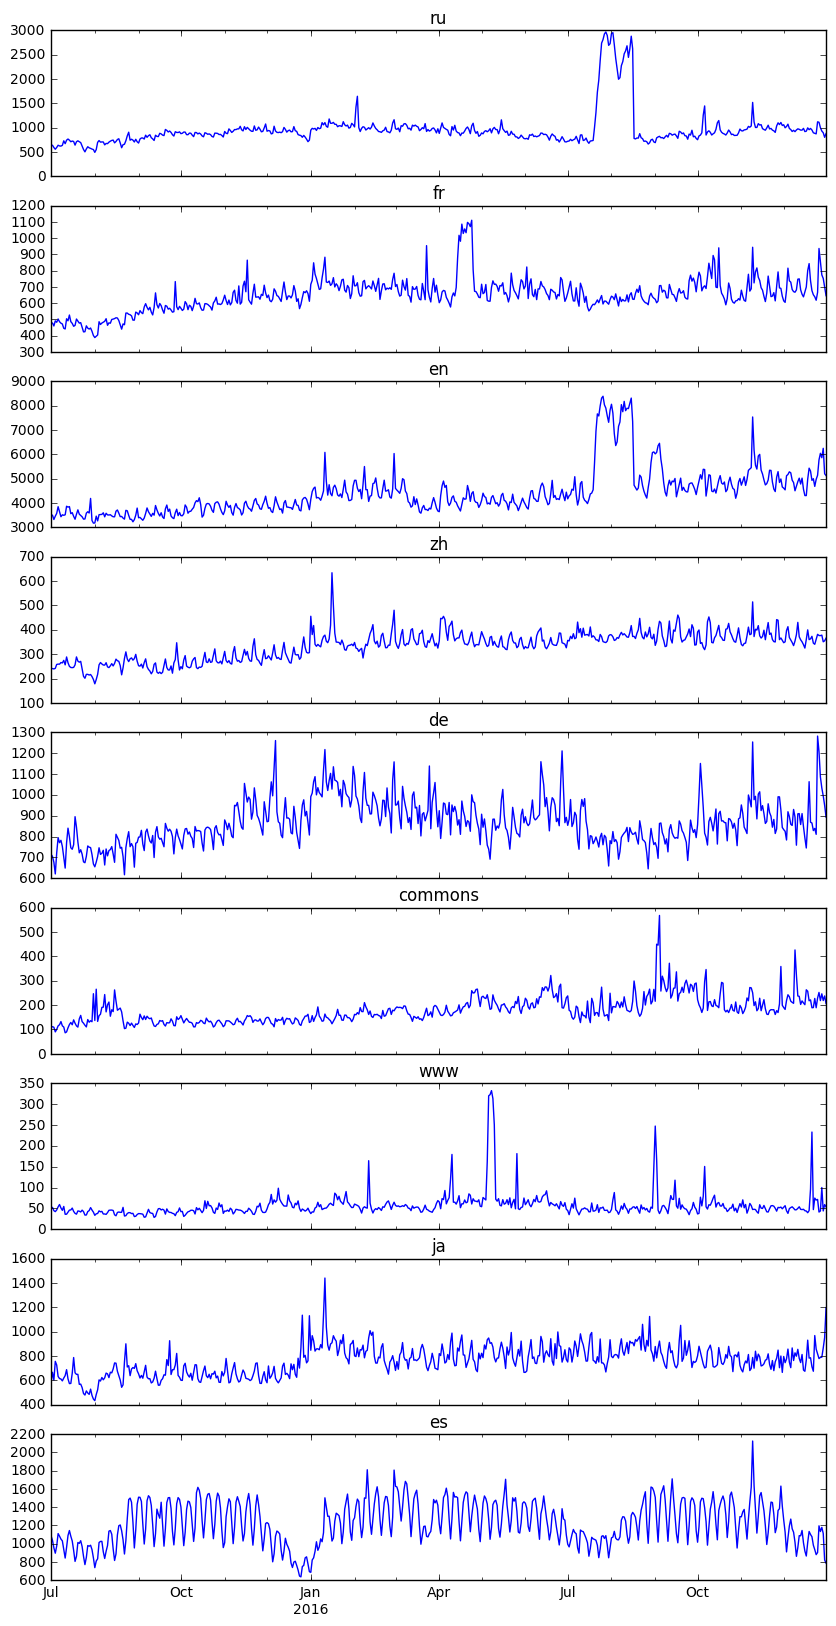

In [21]:
# plotting all TS plots seperately
fig, axs = plt.subplots(nrows=9, figsize=(10, 20), sharex=True)
for i, key in enumerate(avg):
    avg[key].plot(ax=axs[i])
    axs[i].set_title(key)



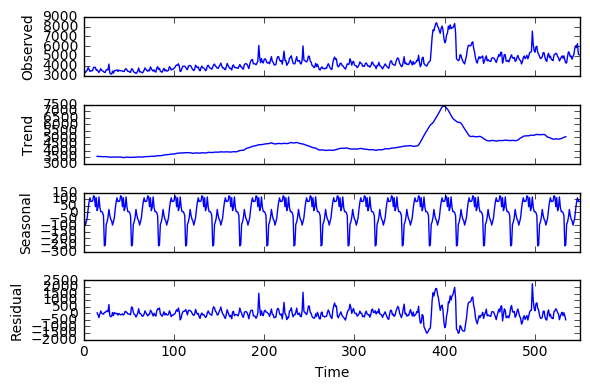

In [22]:
res = sm.tsa.seasonal_decompose(avg['en'].values, freq=30, model='additive')
resplot = res.plot()

In [50]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
autocorrelation = acf(avg['en'], nlags=100)
partial_autocorr = pacf(avg['en'])
autocorrelation

array([ 1.        ,  0.9351334 ,  0.86593346,  0.81268218,  0.77672448,
        0.75100788,  0.74243312,  0.72626052,  0.6786998 ,  0.62488934,
        0.58921265,  0.56991677,  0.56798841,  0.58609264,  0.59884331,
        0.58161579,  0.55414773,  0.53353338,  0.521792  ,  0.5263945 ,
        0.53765202,  0.53582866,  0.49184487,  0.43756898,  0.39579877,
        0.36653835,  0.35005392,  0.35628803,  0.3612481 ,  0.34292334,
        0.32301578,  0.31257489,  0.31333476,  0.32554731,  0.35398619,
        0.37598927,  0.35847003,  0.32900398,  0.31072312,  0.30731357,
        0.31491849,  0.32712855,  0.32771677,  0.30127293,  0.2667026 ,
        0.24063065,  0.22843764,  0.23177871,  0.24911044,  0.26213565,
        0.24134734,  0.21398187,  0.19316558,  0.17948175,  0.18725603,
        0.21148892,  0.22093133,  0.19872011,  0.167647  ,  0.15186601,
        0.14724607,  0.15674186,  0.17878419,  0.19653988,  0.18384291,
        0.16442702,  0.15101529,  0.14879844,  0.16085312,  0.18

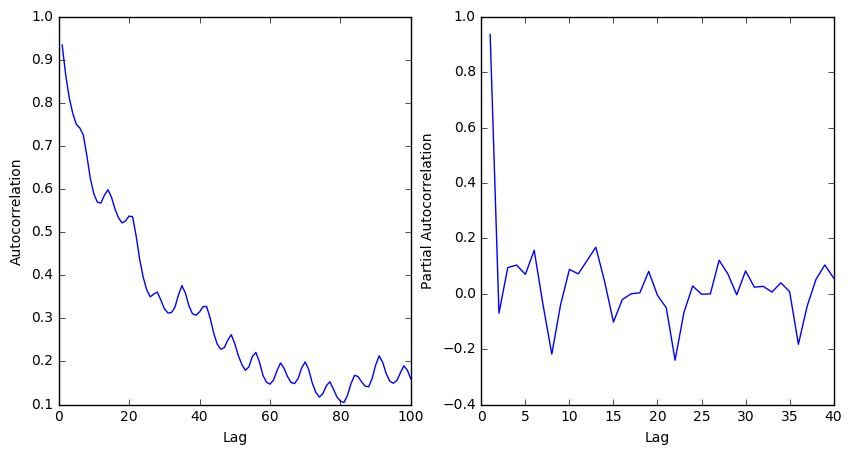

In [51]:
#the Acf is limited to 100 lags only in this case
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.plot(range(len(autocorrelation))[1:], autocorrelation[1:])
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax2.plot(range(len(partial_autocorr))[1:], partial_autocorr[1:])
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')

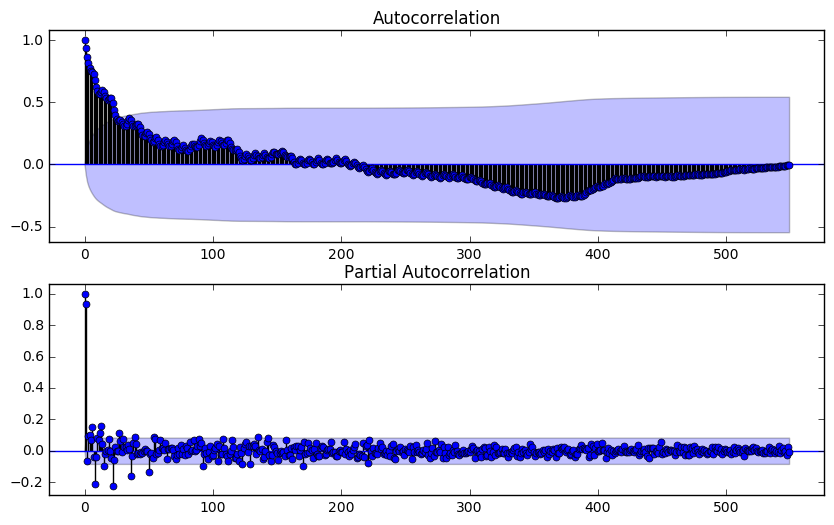

In [79]:
#the Acf is not limited to 100 lags in this case hence the different plot
from statsmodels.graphics import tsaplots
fig, axes = plt.subplots( 2, figsize=(10,6))
_ = tsaplots.plot_acf(avg['en'], axes[0])
_ = tsaplots.plot_pacf(avg['en'], axes[1])


In [35]:
avg['en']

2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
2015-07-06    3849.736021
2015-07-07    3643.523063
2015-07-08    3437.871080
2015-07-09    3517.459391
2015-07-10    3497.571594
2015-07-11    3517.054297
2015-07-12    3869.211216
2015-07-13    3832.417662
2015-07-14    3854.165298
2015-07-15    3563.026589
2015-07-16    3605.074747
2015-07-17    3455.528829
2015-07-18    3335.306288
2015-07-19    3540.557533
2015-07-20    3720.901319
2015-07-21    3544.275386
2015-07-22    3488.537249
2015-07-23    3435.995645
2015-07-24    3340.325991
2015-07-25    3346.974988
2015-07-26    3585.658246
2015-07-27    3643.563216
2015-07-28    3589.972955
2015-07-29    4189.383649
2015-07-30    3283.135930
                 ...     
2016-12-02    4540.718351
2016-12-03    5119.283350
2016-12-04    5171.994400
2016-12-05    5281.185830
2016-12-06    5239.822217
2016-12-07    4938.917579
2016-12-08    4839.252447
2016-12-09  